
MÁSTER BIG DATA & DATA ENGINEERING

Programación avanzada en Python

Autores: Luis Llana Díaz & Yolanda García Ruiz



# Trabajo final

## Nota Preliminar

Antes de desarrollar el proyecto, es aconsejable leer el enunciado completamente, incluyendo las instrucciones de entrega y otros consejos que se  recogen al final de este enunciado.
En este enunciado se pueden producir cambios durante su desarrollo por distintos motivos: porque se descubre una situación anómala que no ha sido prevista al preparar el enunciado, porque algún estudiante encuentre un error o ambigüedad en la descripción o en los datos de partida o por cualquier otra causa. Esto ocurre también en cualquier proyecto real, así que tomárselo con el mejor talante y aprender también de estas eventuales contingencias. Se procurará informar debidamente del mejor modo posible cuando esto se produzca.


## Introducción

En el portal de datos abiertos del Ayuntamiento de Madrid se puede encontrar conjuntos de datos sobre multas de circulación que el Ayuntamiento de Madrid tramita cada mes, con todo el detalle posible sobre cada una de ellas que permite la legislación de protección de datos. 


La dirección del portal mencionado es la siguiente:

https://datos.madrid.es

y el enlace donde se encuentran los datos relativos al detalle de las multas de dirculación  es el siguiente:

https://datos.madrid.es/sites/v/index.jsp?vgnextoid=fb9a498a6bdb9410VgnVCM1000000b205a0aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD


En éste último enlace  podemos encontrar los datos de multas por meses desde el año 2014. Se trata de un conjunto de URLs a ficheros en formato `csv`.
En esta práctica __solo nos va a interesar los datos desde junio el 2017__. 

### Metadatos

En cada uno de los ficheros `csv` podemos encontrar los siguientes datos:


| **Campo**         | **Descripción**                                                                                                                         |
| :---------------- | :-------------------------------------------------------------------------------------------------------------------------------------- |
| **CALIFICACION**  | Gravedad de la infracción cometida.                                                |
| **LUGAR**         | Dirección donde se cometió la infracción (calle y número).                                                                       |
| **MES**           | Mes en el que se registró la infracción.                                                                          |
| **ANIO**          | Año en que ocurrió la infracción (por ejemplo, 2019).                                                                                   |
| **HORA**          | Hora del día en la que se registró la infracción (en formato decimal, ej. `10.42`).                                                     |
| **IMP\_BOL**      | Importe de la sanción (en euros).                                                                                             |
| **DESCUENTO**     | Indica si aplica descuento por pronto pago.                                                                           |
| **PUNTOS**        | Número de puntos retirados del carnet de conducir (si aplica).                                                                          |
| **DENUNCIANTE**   | Autoridad o entidad que impuso la sanción.                                               |
| **HECHO-BOL**     | Descripción textual del hecho sancionado. |
| **VEL\_LIMITE**   | Límite de velocidad permitido (en km/h).                                                                |
| **VEL\_CIRCULA**  | Velocidad real a la que circulaba el vehículo (en km/h).                                                      |
| **COORDENADA\_X** | Coordenada X para geolocalizar la infracción.                                                          |
| **COORDENADA\_Y** | Coordenada Y para geolocalización.                                                                          |




## Librerías

Importar todas las librerías necesarias al principio, tal como propone el estilo `pep-8`. Ej.:
<a href="https://www.python.org/dev/peps/pep-0008/">PEP 8 -- Style Guide for Python Code</a>.

In [2]:
# Sol
import numpy as np
import pandas as pd
import requests
import re
from os import listdir
import urllib
import io
from io import StringIO
import matplotlib.pyplot as plt


## ETAPA 1. Análisis exploratorio y consultas.



### La descarga de datos

En este notebook vamos a estudiar únicamente los datos de diciembre  de 2024.
La URL que permite descargar dichos datos es la siguiente:

In [3]:
url = "https://datos.madrid.es/egob/catalogo/210104-395-multas-circulacion-detalle.csv"

Podemos hacer la petición con `request.get()`:

In [4]:
response = requests.get(url)
if response.status_code == 200:
    print(response.url)

https://datos.madrid.es:443/egobfiles/MANUAL/210104/202412detalle.csv


Como podemos observar, el servidor redirige la url `https://datos.madrid.es/egob/catalogo/210104-395-multas-circulacion-detalle.csv` a la url `https://datos.madrid.es:443/egobfiles/MANUAL/210104/202412detalle.csv` correspondiente al mes 12 del año 2024.

Para crear el dataframe con los datos de las multas de tráfico, podríamos usar cualquiera de las dos url's anteriores, pero nos vamos a quedar con la primera, que es la que aparece en el HTML en `datos.madrid.es` :

In [5]:
# Accedemos al texto 
content = io.StringIO(response.text)
multas = pd.read_csv(content, sep =';', encoding = 'latin1')
multas.head()

,CALIFICACION,LUGAR,MES,ANIO,HORA,IMP_BOL,DESCUENTO,PUNTOS,DENUNCIANTE,HECHO-BOL,VEL_LIMITE,VEL_CIRCULA,COORDENADA-X,COORDENADA-Y
0,LEVE,CL CLARA DEL REY 36,12,2024,20.23,60.0,SI,0,SER,ESTACIONAR CON AUTORIZACIÓN NO VÁLIDA. ...,,,,
1,LEVE,CL CLARA DEL REY 28,12,2024,20.27,90.0,SI,0,SER,"ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIÓ...",,,,
2,GRAVE,CL CANILLAS 63,12,2024,20.45,200.0,SI,0,SER,ESTACIONAR OBSTACULIZANDO LA UTILIZACIÓN DE UN...,,,,
3,LEVE,CL BRAVO MURILLO 24,12,2024,16.30,60.0,SI,0,SER,ESTACIONAR CON AUTORIZACIÓN NO VÁLIDA. ...,,,,
4,LEVE,CL BRAVO MURILLO 16,12,2024,16.50,90.0,SI,0,SER,"ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIÓ...",,,,


### Explorar la estructura de los datos en el dataframe

El método `info` devuelve información acerca de la estructura de un dataframe. Ejecuta el método `info()` sobre el dataframe `multas` y comenta los resultados.
Fíjate en las columnas que representan la hora, el día y el año y observa su tipo de datos. ¿Cuántas filas se han cargado?. Fíjate en los valores distintos de `NaN` en cada una de las columnas.

In [6]:
# Solución
multas.info()

# El método info() del dataframe "multas" nos ha devuelto información sobre los metadatos del mismo, como
# por ejemplo, nombre de las columnas, el tipo de dato, la cantidad de valores no nulos y el tamaño del dataframe en MB.
#
# Las columnas MES y ANIO corresponden a un tipo de dato int64, un número entero de 64 bits y poseen (cada uno) 249801 valores no nulos.
# La columna HORA corresponde a un tipo de dato float, un número real, y posee 249801 valores no nulos.
#
# El "Non-Null Count" corresponde a la cantidad de valores que posee dicha columna y que no son nulo.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249801 entries, 0 to 249800
Data columns (total 14 columns):
 #   Column                                                                                                                                                  Non-Null Count   Dtype  
---  ------                                                                                                                                                  --------------   -----  
 0   CALIFICACION                                                                                                                                            249801 non-null  object 
 1   LUGAR                                                                                                                                                   249801 non-null  object 
 2   MES                                                                                                                                                     2498

###  Exploración de las columnas.

__Se pide:__

__a)__ ¿Cuántos valores distintos hay en la columna `CALIFICACION` del dataframe `multas`? Modifica los valores de dicha columna para que no contengan espacios en blanco. Puedes usar el método  `str.strip()` de la clase Series.

__b)__ ¿Cuántos valores distintos hay en las columnas `DESCUENTO`, `HECHO-BOL` y `DENUNCIANTE` del dataframe `multas`? Modifica los valores de dichas columnas para que no contengan espacios en blanco.

__c)__ Muestra el listado de columnas del dataframe.
* ¿Cuál es el nombre de la columna que representa la velocidad de circulación registrada? Fíjate en el espacio en blanco al final.
* ¿Cuál es el nombre de la columna que representa la coordenada Y de la ubicación geográfica de donde se produce la infracción? Fíjate en la cantidad de espacios en blanco al final.
* Muestra la serie de datos correspondiente a la coordenada Y.
* Usa el método  `rename` de los dataframes para normalizar los nombres de las columnas del dataframe multas, de forma que los nuevos nombres no tengan espacios en blanco al final. Consulta la ayuda del método `rename`; ésta te propone el uso de métodos de la clase `str` a cada elemento del índice de las columnas (o de las filas). En nuestro caso, para eliminar espacios en blanco usaremos el método `str.strip()` sobre el índice de las columnas.
  
__d)__ ¿Observa las columnas relativas a la velocidad. ¿De qué tipo son?. 
¿Cuántos valores distintos hay en las columnas `VEL_LIMITE`, `VEL_CIRCULA`. Por último, estudia la función `pd.to_numeric` de pandas y úsala para transformar el tipo de las columnas  anteriores a tipo numérico.

__e)__ ¿Observa las columnas relativas a la geolocalización. ¿De qué tipo son?. Usa la función `pd.to_numeric` de pandas para transformar el tipo de las columnas  `COORDENADA-X`, `COORDENADA-Y` a tipo numérico.

El dataframe obtenido después de aplicar todas las transformaciones anteriores 

In [ ]:
# Solución A: 

# Primero limpio los datos con str.strip()
multas['CALIFICACION'] = multas['CALIFICACION'].str.strip()

# Finalmente, podemos ver que hay 3 valores únicos en la columna CALIFICACION del dataframe "multas".
valores_unicos = multas['CALIFICACION'].unique() # Resultado: 'LEVE, 'GRAVE y 'MUY GRAVE'.
print(f"Valores únicos: {valores_unicos}")

# O si queremos ver el "count" en lugar de los valores únicos.
conteo = multas['CALIFICACION'].nunique() # Resultado: 3
print(f"Conteo de valores únicos: {conteo}")


Valores únicos: ['LEVE' 'GRAVE' 'MUY GRAVE']
Conteo de valores únicos: 3


In [ ]:
# Solución B:

# Limpio los espacios en blanco de las columnas indicadas.
multas['DESCUENTO'] = multas['DESCUENTO'].str.strip()
multas['HECHO-BOL'] = multas['HECHO-BOL'].str.strip()
multas['DENUNCIANTE'] = multas['DENUNCIANTE'].str.strip()

# A continuación se muestran cuántos valores únicos tiene cada columna.
print(f"DESCUENTO: { multas['DESCUENTO'].nunique() }")      # Resultado: 1
print(f"HECHO-BOL: { multas['HECHO-BOL'].nunique() }")      # Resultado: 345
print(f"DENUNCIANTE: { multas['DENUNCIANTE'].nunique() }")  # Resultado: 6

DESCUENTO: 1
HECHO-BOL: 345
DENUNCIANTE: 6


In [9]:
# Solución C:

# Muestro una lista con el nombre de las columnas del dataframe.
print(multas.columns.tolist())

# 1) La columna que representa la velocidad de circulación registrada es: 'VEL_CIRCULA ', nótese el espacio en blanco al final.
# 2) La columna que representa la coordanada Y de la posición geográfica es "COORDENADA-Y        ", la cual posee una gran cantidad de espacios en blanco a la derecha.
# 3 y 4) Se normalizan los nombres de las columnas con el método "rename" y se muestran los primeros 5 valores de la serie de datos contenida en la columna COORDENADA-Y:
multas = multas.rename(columns=lambda x: x.strip())              # Eliminamos los espacios en blanco de los nombres de las columnas.
print(f"Valores de COORDENADA-Y:\n{multas['COORDENADA-Y']}")   # Finalmente, imprimimos por consola los primeros 5 valores de la serie de datos 'COORDENADA-Y' (los espacios fueron eliminados).


['CALIFICACION', 'LUGAR', 'MES', 'ANIO', 'HORA', 'IMP_BOL', 'DESCUENTO', ' PUNTOS', 'DENUNCIANTE', 'HECHO-BOL', 'VEL_LIMITE', 'VEL_CIRCULA ', 'COORDENADA-X', 'COORDENADA-Y                                                                                                                                          ']
Valores de COORDENADA-Y:
0                    
1                    
2                    
3                    
4                    
             ...     
249796               
249797               
249798               
249799               
249800               
Name: COORDENADA-Y, Length: 249801, dtype: object


In [ ]:
# Solución D:

# 1) Compruebo el tipo de dato de VEL_CIRCULA y VEL_LIMITE:
print("Tipo de datos:")
print(multas[['VEL_CIRCULA', 'VEL_LIMITE']].dtypes)      # Resultado: Ambos son de tipo object

# 2) Cuento los valores distintos en ambas columnas del dataframe:
print("\nValores distintos:")
print("VEL_LIMITE:", multas['VEL_LIMITE'].nunique())     # Resultado: 6
print("VEL_CIRCULA:", multas['VEL_CIRCULA'].nunique())   # Resultado: 100

# 3) Convierto las columnas a tipo numérico.
# Uso el parámetro errors='coerce' para que los valores que no son número se conviertan en NaN, evitando así un error.
# También uso downcast='float' para que intente convertir los números a float32 en lugar de float64, y así ahorrar memoria.
multas['VEL_LIMITE'] = pd.to_numeric(multas['VEL_LIMITE'], errors='coerce', downcast='float')
multas['VEL_CIRCULA'] = pd.to_numeric(multas['VEL_CIRCULA'], errors='coerce', downcast='float')

# Finalmente muestro el contenido de las columnas:
print(multas[['VEL_CIRCULA', 'VEL_LIMITE']].dtypes) # Resultado: float32
print('VEL_LIMITE: ', multas['VEL_LIMITE'].dropna().head(20).to_list())
print('VEL_CIRCULA: ', multas['VEL_CIRCULA'].dropna().head(20).to_list())

Tipo de datos:
VEL_CIRCULA    object
VEL_LIMITE     object
dtype: object

Valores distintos:
VEL_LIMITE: 7
VEL_CIRCULA: 101
VEL_CIRCULA    float32
VEL_LIMITE     float32
dtype: object
VEL_LIMITE:  [50.0, 50.0, 60.0, 50.0, 60.0, 60.0, 60.0, 50.0, 50.0, 60.0, 60.0, 50.0, 60.0, 50.0, 50.0, 60.0, 60.0, 50.0, 50.0, 50.0]
VEL_CIRCULA:  [74.0, 79.0, 100.0, 73.0, 103.0, 96.0, 91.0, 77.0, 95.0, 94.0, 91.0, 73.0, 104.0, 75.0, 82.0, 109.0, 94.0, 83.0, 84.0, 81.0]


In [ ]:
# Solución E:

# 1) Veamos los tipos de datos de COORDENADA-X y COORDENADA-Y:
print(multas[['COORDENADA-X', 'COORDENADA-Y']].dtypes)    # Resultado: Ambos son de tipo object

# 2) Convierto ambas columnas a tipo numérico:
multas['COORDENADA-X'] = pd.to_numeric(multas['COORDENADA-X'], errors='coerce')
multas['COORDENADA-Y'] = pd.to_numeric(multas['COORDENADA-Y'], errors='coerce')

# Finalmente muestro el contenido de las columnas:
print(multas[['COORDENADA-X', 'COORDENADA-Y']].dtypes)   # Resultado: float64
print('COORDENADA-X: ', multas['COORDENADA-X'].dropna().head(10).to_list())
print('COORDENADA-Y: ', multas['COORDENADA-Y'].dropna().head(10).to_list())

COORDENADA-X    object
COORDENADA-Y    object
dtype: object
COORDENADA-X    float64
COORDENADA-Y    float64
dtype: object
COORDENADA-X:  [4407.67, 4407.67, 4407.67, 4407.67, 4397.66, 4397.66, 4379.9, 4397.66, 4400.43, 4400.45]
COORDENADA-Y:  [44748.29, 44748.29, 44748.29, 44748.29, 44751.88, 44751.88, 44743.71, 44751.88, 44736.05, 44736.05]


In [ ]:
# Finalmente muestro la información sobre el dataframe con las transformaciones realizadas.
multas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249801 entries, 0 to 249800
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CALIFICACION  249801 non-null  object 
 1   LUGAR         249801 non-null  object 
 2   MES           249801 non-null  int64  
 3   ANIO          249801 non-null  int64  
 4   HORA          249801 non-null  float64
 5   IMP_BOL       249801 non-null  float64
 6   DESCUENTO     249801 non-null  object 
 7   PUNTOS        249801 non-null  int64  
 8   DENUNCIANTE   249801 non-null  object 
 9   HECHO-BOL     249801 non-null  object 
 10  VEL_LIMITE    22182 non-null   float32
 11  VEL_CIRCULA   22182 non-null   float32
 12  COORDENADA-X  123882 non-null  float64
 13  COORDENADA-Y  123882 non-null  float64
dtypes: float32(2), float64(4), int64(3), object(5)
memory usage: 24.8+ MB


### Creación de columna nueva

__a)__ A partir del dataframe `multas` que contiene las columnas `MES`, `ANIO` y `HORA`, crear una nueva columna llamada `fecha` de tipo datetime que combine dicha información en un único objeto de fecha y hora. Usa como día el día 1.

__b)__ Modifica el dataframe `multas` de forma que el índice sea el valor de la columna creada anteriormente.

__c)__ Elimina del dataframe la columna `fecha`.



In [ ]:
# Solución A:
# Creo una columna 'fecha' usando las columnas del dataframe 'multas'.
multas['fecha'] = pd.to_datetime({
    'year': multas['ANIO'],
    'month': multas['MES'],
    'day': 1,                   # La columna día no existe en el dataframe "multas", por lo tanto usaré el día 1 como se indica en el enunciado.
    'hour': multas['HORA']
})

# Muestro el resultado.
print('fechas:', multas['fecha'].dropna().head(4).to_list())

# Solución B y C:
# Modifico el dataframe para que los valores de la columna 'fecha' actúen como índice.
# Usaré el parámetro inplace=True para que la columna 'fecha' desaparezca al convertirla en índice, tal y como se pide en el enunciado.
multas.set_index('fecha', inplace=True)

# Verifico que los valores de la columna fecha aparecen efectivamente como los valores del índice.
print('Índices:', multas.index)

# Verifico si la columna 'fecha' ha sido borrada del dataframe.
print('La columna fecha existe:', 'fecha' in multas.columns)

fechas: [Timestamp('2024-12-01 20:13:48'), Timestamp('2024-12-01 20:16:12'), Timestamp('2024-12-01 20:27:00'), Timestamp('2024-12-01 16:18:00')]
Índices: DatetimeIndex(['2024-12-01 20:13:48', '2024-12-01 20:16:12',
               '2024-12-01 20:27:00', '2024-12-01 16:18:00',
               '2024-12-01 16:30:00', '2024-12-01 17:03:36',
               '2024-12-01 17:07:12', '2024-12-01 18:00:36',
               '2024-12-01 18:26:24', '2024-12-01 20:12:36',
               ...
               '2024-12-01 18:12:36', '2024-12-01 19:04:12',
               '2024-12-01 20:10:48', '2024-12-01 21:12:36',
               '2024-12-01 22:10:12', '2024-12-01 10:24:00',
               '2024-12-01 08:07:48', '2024-12-01 08:12:00',
               '2024-12-01 12:07:48', '2024-12-01 12:30:36'],
              dtype='datetime64[ns]', name='fecha', length=249801, freq=None)
La columna fecha existe: False


## Consultas

El dataframe obtenido después de aplicar todas las transformaciones de la sección anterior se considera límpio. Usando dicho dataframe, se pide realizar las siguientes consultas: 


### C1
Crear un nuevo dataframe llamado `multas_hora` que contenga el número de multas registradas por hora. Muestra cómo evoluciona el número de multas a lo largo del tiempo mediante un gráfico de líneas como el que se muestra:

<div align="center">
<img src="porhora.png" alt="hora" style="width: 60%;">
</div>

### C2 
Crea un dataframe que contenga información del número de multas por calificación. Muestra también la información mediante un diagrama de barras limilar al que se muestra:

<div align="center">
<img src="barras_cal.png" alt="hora" style="width: 60%;">
</div>

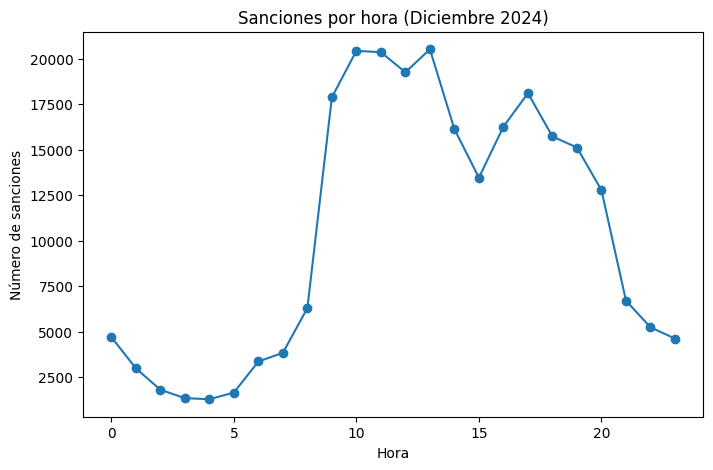

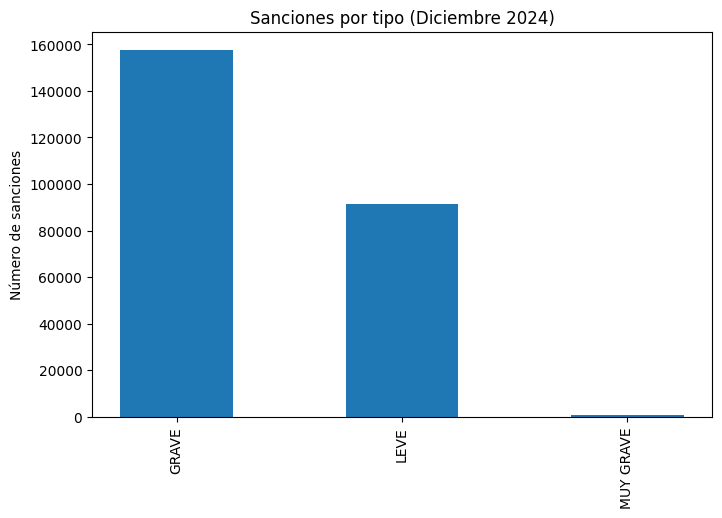

In [ ]:
# Solución C1:
# Primero convierto la columna HORA a entero para que los datos se muestren como en el gráfico del enunciado.
# Para obtener 'multas_hora' agrupo los valores según la columna 'HORAS' y luego calculo el tamaño de los valores agrupados. 
# Finlamente uso reset_index para convertir los resultados a dataframe.
multas['HORA'] = multas['HORA'].astype(int)
multas_hora = multas.groupby('HORA').size().reset_index(name='NUM_MULTAS')

# Dibujo el gráfico
plt.figure(figsize=(8,5))
plt.plot(multas_hora['HORA'], multas_hora['NUM_MULTAS'], marker='o')
plt.xlabel('Hora')
plt.ylabel('Número de sanciones')
plt.title('Sanciones por hora (Diciembre 2024)')
plt.show()

# Solución C2:
# Primero agrupo por calificación, después obtengo el conteo y finalmente se convierte el resultado a dataframe.
multas_calificacion = multas.groupby('CALIFICACION').size().reset_index(name='NUM_MULTAS')

# Dibujo el gráfico
plt.figure(figsize=(8,5))
plt.bar(multas_calificacion['CALIFICACION'], multas_calificacion['NUM_MULTAS'], width=0.5)
plt.title('Sanciones por tipo (Diciembre 2024)')
plt.ylabel('Número de sanciones')
plt.xticks(rotation=90)
plt.show()

### C3
 
En este ejercicio se analizará cómo evoluciona el número de multas por hora en función de su calificación (LEVE, GRAVE o MUY GRAVE). Crear un nuevo dataframe llamado `multas_hora_tipo` que contenga el número de multas registradas por hora y calificación. Muestra cómo evoluciona el número de multas a lo largo del tiempo mediante un gráfico de líneas como el que se muestra:

<div align="center">
<img src="porhora_tipo.png" alt="hora" style="width: 60%;">
</div>

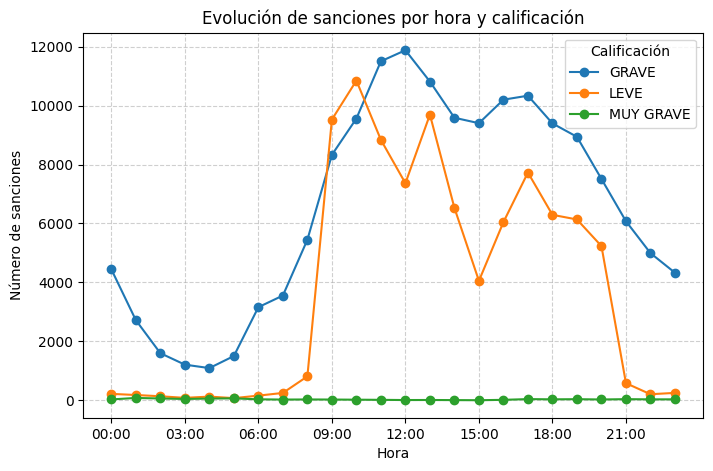

In [ ]:
# Solución C3:
# Creo el datase 'multas_hora_tipo' agrupando por las columnas HORA y CALIFICACION y obtenemos el conteo las sanciones en cada categoría.
multas_hora_tipo = multas.groupby(['HORA', 'CALIFICACION']).size().reset_index(name='NUM_MULTAS')

# Reorganizo el dataframe para que CALIFICACION sea la columna y HORA la fila
multas_hora_tipo_final = multas_hora_tipo.pivot(index='HORA', columns='CALIFICACION', values='NUM_MULTAS')

# Creo las horas que se mostrarán en las etiquetas del eje X del gráfico.
horas = multas_hora_tipo_final.index[::3]

# Genero el gráfico con los tres tipos de calificación.
plt.figure(figsize=(8,5))
for tipo in multas_hora_tipo_final.columns:
    plt.plot(multas_hora_tipo_final.index, multas_hora_tipo_final[tipo], marker='o', label=tipo)
plt.title("Evolución de sanciones por hora y calificación")
plt.xlabel("Hora")
plt.ylabel("Número de sanciones")
plt.legend(title="Calificación")
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(horas, [f"{h:02d}:00" for h in horas])
plt.show()

### C4
Vamos a comparar comparar la velocidad límite de la vía con la velocidad real registrada en cada infracción. Utiliza un diagrama de dispersión (scatter) en el que el eje X represente la velocidad límite, y el eje Y represente la velocidad registrada. Por ejemplo:
<div align="center">
<img src="velocidades.png" alt="hora" style="width: 60%;">
</div>

/var/folders/67/zh00dnss58s7bb88ffbpm7bc0000gn/T/ipykernel_1744/106517889.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


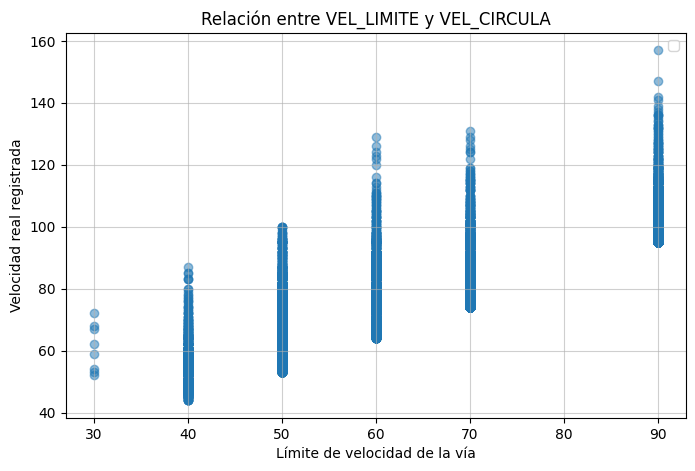

In [16]:
# Solución C4:
# Usaremos la función scatter para generar el diagrama de dispersión.
plt.figure(figsize=(8,5))
plt.scatter(multas['VEL_LIMITE'], multas['VEL_CIRCULA'], alpha=0.5)
plt.xlabel("Límite de velocidad de la vía")
plt.ylabel("Velocidad real registrada")
plt.title("Relación entre VEL_LIMITE y VEL_CIRCULA")
plt.legend()
plt.grid(True, linestyle='-', alpha=0.6)
plt.show()

### C5

Encuentra la mayor diferencia en % de velocidad entre la velocidad permitida y a la que se circulaba: (vel_circula-vel_limite)/vel_limite. 

(Sol: A las 17:22, en AV TRECE ROSAS FAROLA 69, se produce una infracción por SOBREPASAR LA VELOCIDAD MÁXIMA. 72Km/h en vía limitada a 30km/h)

In [ ]:
# Solución C5:

# Realizo el cálculo para generar la columna 'VEL_DIFERENCIA' con el porcentaje de diferencia entre VEL_CIRCULA y VEL_LIMITE. 
multas['VEL_DIFERENCIA'] = (multas['VEL_CIRCULA'] - multas['VEL_LIMITE']) / multas['VEL_LIMITE']

# Elimino las filas con valores NaN
multas_limpio = multas.dropna(subset=['VEL_LIMITE', 'VEL_CIRCULA'])

# Obtengo las filas con la mayor diferencia
valor_superior = multas_limpio['VEL_DIFERENCIA'].idxmax()
resultados = multas_limpio.loc[valor_superior]

# Resultado
resultados[['HORA', 'LUGAR', 'VEL_LIMITE', 'VEL_CIRCULA', 'VEL_DIFERENCIA']]

,HORA,LUGAR,VEL_LIMITE,VEL_CIRCULA,VEL_DIFERENCIA
fecha,,,,,
2024-12-01 17:13:12,17,AV TRECE ROSAS FAROLA 69,30.0,72.0,1.400000
2024-12-01 17:13:12,17,AV ANDALUCIA 73,60.0,109.0,0.816667
2024-12-01 17:13:12,17,AV LOGROÑO FAROLA 67,50.0,74.0,0.480000
2024-12-01 17:13:12,17,F060 AV MAYORAZGO,50.0,60.0,0.200000
2024-12-01 17:13:12,17,"M-30 XC K 10,300 CR3",70.0,86.0,0.228571
2024-12-01 17:13:12,17,"M-30 XC K 19,06 CR4",70.0,74.0,0.057143
2024-12-01 17:13:12,17,"M-30 XC K 19,06 CR4",70.0,82.0,0.171429
2024-12-01 17:13:12,17,"M-30 XC K 10,300 CR3",70.0,78.0,0.114286
2024-12-01 17:13:12,17,"M-30 XC K 10,300 CR3",70.0,79.0,0.128571


### C6
__a)__ Crear un nuevo dataframe llamado `resumen_lugar` que contenga la información del número de multas y la recaudación total de las multas agrupadas por dirección.  Este dataframe debe contener además la información del punto medio de las coordenadas geográficas de cada dirección. El resultado será algo del estilo:

|LUGAR 	|num_multas 	|recaudacion 	|latitud media del lugar 	|longitud media del lugar|
|:----|:------:|----:|:---:|:--:|
| 	CALLE ALCALA 51 	| 7440|  	1488000.0 	| 4474540.0 	| 441089.56| 
|  	CALLE GRAN VIA 71 | 	5355 | 	1071000.0|  	4474951.5 	| 439718.47| 
|  	CALLE ATOCHA 125 	| 4345|  	869000.0 	| 4473465.0 	| 441189.90| 
| 	A42PK5.750 ENT C1 	| 3423|  	683830.0 	| 4469061.0 	| 438863.81| 

__b)__ Crear un DataFrame con las 500 localizaciones con mayor número de multas. El nuevo dataframe ha de llamarse `resumen_lugar_500`.



In [17]:
# sol:


### C7


A partir del dataframe `resumen_500` calculado anteriormente, vamos a representar en un mapa de madrid los puntos donde se ocurren las infracciones. Estudiar y ejecutar el siguiente código:

In [18]:
from pyproj import Transformer
import folium
print(folium.__version__)

ModuleNotFoundError: No module named 'pyproj'

In [ ]:
# Convertir coordenadas proyectadas (UTM) a lat/lon
transformer = Transformer.from_crs("epsg:25830", "epsg:4326")  # ETRS89/UTM30N -> WGS84
resumen_lugar_500[['lat', 'lon']] = resumen_lugar_500.apply(lambda row: pd.Series(transformer.transform(row['lon'], row['lat'])), axis=1)
resumen_lugar_500.head()

,LUGAR,num_multas,recaudacion,lat,lon
0,CALLE ALCALA 51,7440,1488000.0,40.419403,-3.694408
1,CALLE GRAN VIA 71,5355,1071000.0,40.423012,-3.710607
2,CALLE ATOCHA 125,4345,869000.0,40.409726,-3.693126
3,A42PK5.750 ENT C1,3423,683830.0,40.369885,-3.720116
4,CALLE SAN BERNARDO 91,3348,669600.0,40.429111,-3.706179


`pyproj`  se usa para trabajar con sistemas de coordenadas geográficas, mientras que `Transformer` permite convertir coordenadas entre diferentes sistemas de referencia (por ejemplo, de coordenadas UTM a latitud/longitud WGS84).

El siguiente fragmento de código nos va a permitir dibujar en el mapa (centrado en la Puerta del Sol), puntos de color rojo, con tamaño proporcional al número de multas registradas.

In [ ]:
# Crear mapa centrado en la puerta del sol Madrid 
lat_centro = 40.416729
lon_centro = -3.703339
# Creamos el mapa
m = folium.Map(location=[lat_centro, lon_centro], zoom_start=12)

# Añadir puntos rojos proporcional al número de multas
for idx, row in resumen_lugar_500.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius = max(1,np.log2(row['num_multas'])), # tamaño proporcional al número de multas (para suavizar))
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.6,
        popup=f"{row['LUGAR']}\nMultas: {row['num_multas']}\nRecaudación: {row['recaudacion']}€\n"
    ).add_to(m)

# Guardar mapa
name = "mapa_multas_madrid.html"
m.save(name)
print(f"Se ha generado el mapa: {name} para visualizar en el navegador")

Se ha generado el mapa: mapa_multas_madrid.html para visualizar en el navegador


__Se pide:__

Mostrar la información de las multas en un mapa usando folium. Distinguir los puntos dependiendo de  la calificación de las multas, por ejemplo, puntos rojos para las graves (máximo 500) y verdes para las leves.

In [ ]:
# Sol 


### C8

La columna DENUNCIANTE tiene información acerca de la entidad que ha realizado la denuncia. Calcula la frecuencia de cada uno de los tipos de denunciante. Dibuja un diagrama de barras ordenado de mayor a menor. Por ejemplo:

<div align="center">
<img src="pordenunciante.png" alt="hora" style="width: 80%;">
</div>

In [ ]:
# Sol


### C9

De todas las multas tramitadas, ¿cuántas han sido tramitadas por agentes de movilidad? Crea un nuevo dataframe que contenga solo las multas tramitadas por agentes de movilidad.

In [ ]:
# Sol


### C10

En este ejercicio se analizará cómo evoluciona el número de multas por hora en función del denunciante. Crear un nuevo dataframe llamado `multas_hora_denunciante` que contenga el número de multas registradas por hora y denunciante. Muestra cómo evoluciona el número de multas a lo largo del tiempo mediante un gráfico de líneas como el que se muestra:

<div align="center">
<img src="porhora_denunciante.png" alt="hora" style="width: 60%;">
</div>



In [ ]:
# Solución


### C11

¿Cuánto dinero (como máximo) se ha recaudado en el mes de Diciembre de 2024 con el cobro de las multas? Una multa puede tener descuento por pronto pago del 50%, pero cabe la posibilidad de que el infractor no realice el pago en fecha para acojerse a dicho descuento. Si a ninguna de las multas se aplica el descuento, el importe máximo recaudado será la suma de todos los importes.


In [ ]:
# Sol


### C12
¿Cuánto dinero se ha recaudado (máximo y mínimo) y cuántas multas se han tramitado   por tipo de tramitador?. Una multa puede tener descuento por pronto pago del 50%, pero cabe la posibilidad de que el infractor no realice el pago en fecha para acojerse a dicho descuento.

In [ ]:
# Sol


# ETAPA 2: Construcción del módulo 

El objetivo de esta etapa es realizar un paquete con clases y módulos, de forma que la respuesta a algunes de las consultas anteriores se pueda realizar con una llamada a métodos de una clase.

En esta sección se proporcionan algunas instrucciones para la creación del módulo `traficFines`.
La gran mayoría de métodos y funciones pedidas aquí, se han implementado de alguna manera en la sección anterior, por lo que la construcción del módulo y las clases que se pide a continuación es en gran medida una reorganización de código. El módulo `traficFines` debe exportar las clases descritas a continuación.

## Módulo `cache`

En muchos programas necesitamos descargar información de Internet para procesarla. En estos casos, es muy posible que se acceda a la misma url varias veces, lo que  consume tiempo y ancho de banda innecesarios. Además, durante el desarrollo,  puede ser más cómodo trabajar con una copia local ya descargada, en lugar de repetir la descarga. Para que estas tareas sean más sencillas vamos a crear un módulo llamado `cache` que tendrá 2 clases `Cache` y `CacheURL`. 
* La clase `Cache`, que gestiona el almacenamiento de ficheros descargados en un directorio local.

* La clase `CacheURL`, que amplía `Cache` para trabajar específicamente con URLs de Internet.


El módulo `cache` debe contener los siguientes elementos:

### Excepciones
* `CacheError` para cualquier tipo de situación de error que se pueda producir en el módulo.



### Clase `Cache`

Se encargará de guardar y recuperar datos en disco, de forma que estén disponibles incluso después de cerrar el programa.

La clase `Cache` va a almacenar cualquier tipo de fichero asociado con un identificador. Por defecto, los datos se almacenarán en el home del usuario, en un directorio para este ejercicio. Por ejemplo:
```
CACHE_DIR = Path.home() / ".my_cache"
```
Consultar [Path.home](https://docs.python.org/3/library/pathlib.html#pathlib.Path.home) del módulo `pathlib`.
Pero en el constructor se podría indicar que fuera cualquier otra carpeta del sistema operativo.

La clase `Cache` debe estar pensada para ser usada desde otras aplicaciones, no solo este ejercicio, por lo que cada objeto de la clase cache deberá tener los siguientes atributos:

* `app_name`, un `str` que será un nombre asociado a la aplicación concreta. Este atributo se usará para crear una subcarpeta dentro de la carpeta  `CACHE_DIR`. De esta forma, cada aplicación tendrá una carpeta dentro de `CACHE_DIR` para almacenar sus datos.
* `cache_dir`, un string con la ruta completa de la subcarpeta que usará la aplicación para almacenar sus datos.
* `obsolescence`, un `int` que indica el número de días que consideraremos que los datos de la caché siguen siendo válidos.
  
Estos atributos serán internos (privados) y solo podrán consultarse a través de propiedades (@property), nunca modificarse desde fuera.

Deberá tener (al menos) los siguientes métodos:

* `set(self, name:str, data:str) -> None` : método que almacena en `cache_dir` los datos en `data` con el nombre `name`.
* `exists(self, name: str) -> bool` : Comprueba si ya existe un fichero con el nombre name en la caché `cache_dir`.
* `load(self, name: str) -> str`: método que recupera los datos almacenados en la caché, con el nombre `name`. Si no hay ningún dato asociado deberá lanzar la excepción `CacheError`.
* `how_old(self, name: str) -> float`: método que nos dirá la edad en milisegundos del fichero almacenado en la caché con el nombre indicado. Esto sirve para comprobar si el fichero está caducado según el valor de `obsolescence`.
* `delete(self, name: str) -> None`: método que borra de la caché el fichero  con nombre `nane`. Si  no existe, no se lanza ninguna excepción.
* `clear(self) -> None`: método que borra todos los elementos de la caché.

Se pueden definir todos los métodos auxiliares que se deseen. Si se quiere indicar algún error no indicado, se debe lanzar la excepción `CacheError`.


### Clase `CacheUrl`

La clase `CacheURL` será una especialización de la clase `Cache` para trabajar específicamente con datos descargados de internet (URLs). 

Las URLs suelen ser muy largas y contener caracteres especiales (?, =, &, / …) que pueden dar problemas al usarlas directamente como nombres de ficheros en el sistema operativo.

El objetivo principal es poder reutilizar datos de una misma URL sin necesidad de descargarla varias veces, y hacerlo de una forma segura y portable en todos los sistemas operativos.

Para evitar problemas, no vamos a guardar la URL como nombre de fichero directamente, sino que guardaremos un hash de la URL. De esta forma, se obtiene un nombre de fichero corto y seguro.

Por ejemplo:

In [ ]:
import hashlib
url = 'https://agenciatributaria.madrid.es/portal/site/contribuyente'
url_hashed = hashlib.md5(url.encode('utf-8')).hexdigest()
url_hashed

'456cb7e307cb1e8bb1e31528b2f8478b'

La clase `CacheURL` comparte el constructor con la clase `Cache` y los métodos que debe definir son:

* `get(self, url:str) -> str`
  Este método va a realizar un `get`  a la url indicada. Este método consultará si tiene ya un objeto asociado a esta petición, si no lo tiene realizará la petición correspondiente, guardará el resultado en la caché. Devolverá el objeto correspondiente.


Como el resultado depende de los argumentos dados, el nombre asociado al objeto que se guarda en la caché será un hash de la url junto con los parámetros opcionales a la petición.

Se deben redefinir los métodos de la clase de la forma adecuada:
* `exists(self, url: str, **kwargs) -> bool` 
* `load(self, url: str, **kwargs) -> bool` 
* `how_old(self, name: str, **kwargs) -> float`
* `delete(self, name: str, **kwargs) -> None`


## Módulo `madridFines`

El módulo `madridFines' debe contener los siguientes elementos:

### Constantes

Se definen (al menos) las constantes `ROOT` y `MADRID_FINES_URL` con los valores correspondientes.
```
RAIZ = "https://datos.madrid.es/"
MADRID_FINES_URL = "sites/v/index.jsp?vgnextoid=fb9a498a6bdb9410VgnVCM1000000b205a0aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD"

```

### Excepciones
* `MadridError` para cualquier tipo de situación de error que se pueda producir en el módulo.

### Funciones

Se definen (al menos) las siguientes funciones:

* `get_url(year: int, month: int) -> str` . Función que recibe como argumentos un mes (1–12) y un año (con cuatro cifras, ej. 2024) y devuelva la URL del fichero CSV con los datos de multas correspondiente a ese mes y año, disponible en el portal de datos abiertos del Ayuntamiento de Madrid. Si el mes y año no están en la página se debe producir una excepción. Se recomienda resolver este ejercicio realizando scraping. Usar la librería `requests`  para hacer la petición HTTP y recuperar el HTML de la página. Usar `beautifulsoup4 (BS4)`  para parsear el HTML y localizar los enlaces correspondientes al año/mes buscado.


### Clase `MadridFines`

La clase `MadridFines` tiene como objetivo gestionar, limpiar, almacenar y analizar datos de multas de tráfico del Ayuntamiento de Madrid descargados desde el portal de datos abiertos. Es una clase pensada para automatizar el ciclo completo de análisis de multas: desde la descarga y preprocesamiento de multas de varios meses, hasta la generación de resúmenes y gráficos explicativos.

* Los objetos de la clase tienen tres atributos que se corresponden con:
  - `cacheurl`: un objeto de tipo `CacheURL` que permitirá gestionar la descarga de datos.
  - `data`: atributo para almacenar los datos (de tipo `pd.DataFrame`). Este atributo podrá contener multas de distintos meses.
  - `loaded`: un atributo de tipo lista de tuplas de la forma `(month, year)` para registrar los meses de datos contenidos en el atributo `data`.
    Los dos últimos atributos están relacionados, por lo que ha de garantizarse que su modificación no podrá realizarse desde fuera de la clase. 

* La clase ha de contener al menos los siguientes métodos:

  - `__init__`: método constructor. Acepta los argumentos `app_name` y `obsolescence` que se usarán para inicializar el atributo `cacherl`. El valor inicial de los atributos `data` y `loaded` será el dataframe vacío y la lista vacía respectivamente.
 
  - `load(year: int, month: int, cacheurl) -> pd.DataFrame`: se trata de un método interno  y estático que utiliza el objeto cacheurl para acceder a los datos de multas del año `year` y mes `month`, a partir del cual se crea un dataframe de pandas que se será devuelto por la función.
 
  - `clean(df: pd.DataFrame) -> None`: método interno y estático que permite limpiar y normalizar los datos del dataframe `df`. La limpieza y preprocesamiento a realizar es la que se define en la sección `ETAPA 1` (elimina espacios en blanco en columnas de texto, convierte columnas numéricas (VEL_CIRCULA, VEL_LIMITE, COORDENADA-X, COORDENADA-Y), crea una columna fecha a partir de ANIO, MES y HORA, etc.). Es posible que no todos los meses tengan las mismas columnas. Por ejemplo, en Mayo de 2019, las columnas son COORDENADA_X, COORDENADA_Y, en lugar de  COORDENADA-X, COORDENADA-Y.
 
  - `add(self, year: int, month: int|None = None) -> None`: Permite añadir información de multas de un mes y un año concreto al dataset `data` actual. Evita duplicar meses ya cargados (si el mes ya existe, el método no hace nada). En caso contrario, se descargan los datos del año `year` y mes `month` usando el método `load`, se realiza la limpieza del dataframe descargado usando el método `clean` y se añade al dataset actual `data`. Este método tendrá que actualizar correctamente el atributo `loaded`. En el caso de que el parámetro `month` sea None, se descargarán los datos del año completo.
 
  - `fines_hour(self, fig_name: str)-> None`: método que, siguiendo el planteamiento de la consulta C1, genera un gráfico de líneas que muestra la evolución del número de multas a lo largo de las horas del día. Si hay varios meses cargados, dibuja una línea por cada mes. La función guarda el gráfico con nombre `fig_name` (por ejemplo `evolucion_multas.png`). Ejemplo:
    
    <div align="center">
    <img src="evolucion_multas05.png" alt="hora" style="width: 60%;">
    </div>
    
  - `fines_calification(self)-> pd.DataFrame`: analiza la distribución de multas por calificación, mes y año. Devuelve un DataFrame con el número total de multas distinguiendo por tipo para cada uno de los meses. El dataframe obtenido tendrá el siguiente aspecto:
    ```
        CALIFICACION   GRAVE    LEVE  MUY GRAVE
    MES ANIO                               
    5   2019       61124  111017        747
        2020       36752   43431        454
        2021       58935   97140        833
        2022      146864  102849        987
        2023      137561   94448       1092
    ```
  - `total_payment(self) -> pd.DataFrame`: método que genera un resumen con el importe total (máximo y mínimo) recaudado por mes y año. Seguir el razonamiento de las consultas C11 y C12. Una multa puede tener descuento por pronto pago del 50%, pero cabe la posibilidad de que el infractor no realice el pago en fecha para acojerse a dicho descuento.


## Tests

Define los tests que creas necesarios para comprobar que las clases funcionan correctamente. Los tests deberán estar en un directorio independiente, dentro del proyecto, pero no en el paquete que se distribuye. Es necesario que los tests tengan una cobertura cercana al 100% de los ficheros del paquete y que simulen los accesos a Internet y que los datos que potencialmente en el sistema de ficheros (por ejemplo el funcionamiento de la caché) se haga dentro de una carpeta data que se encuentre en el directorio de los tests.


# Entrega
La entrega consistirá en un fichero comprimido `zip` (no fichero `.rar`)  con lo siguiente:
- Un directorio con todos los ficheros del paquete. El directorio del paquete tiene que tener todo lo necesario para poder generar el fichero whl.
- El fichero whl para poder instalar el paquete.
- Fichero README.md con instrucciones de uso de la entrega.
- El presente cuaderno de jupyter con las consultas de la Etapa 1.
- Nuevo cuaderno de jupyter que contenga ejemplos e instrucciones para validar el correcto funcionamiento de las clases implementadas (y las excepciones correspondientes).

# Declaración responsable sobre autoría y uso ético de inteligencia artificial, otros recursos o ayuda externa

Con la entrega de esta tarea, declaro de manera responsable que
es el resultado de mi trabajo intelectual personal y creativo, y que ha sido elaborado de acuerdo con los principios éticos y las normas de integridad vigentes en la comunidad académica y, más
específicamente, en la [Universidad Complutense de Madrid](https://www.ucm.es/file/declaracion-responsable-sobre-autoria-y-uso-%C3%89tico-de-herramientas-de-ia).

Soy, pues, autor del material aquí incluido y, cuando no ha sido así y he tomado el material de
otra fuente, lo he citado o bien he declarado su procedencia de forma clara -incluidas, en su
caso, herramientas de inteligencia artificial-. Las ideas y aportaciones principales incluidas en este trabajo, y que acreditan la adquisición de competencias, son mías y no proceden de otras fuentes o han sido reescritas usando material de otras fuentes.

# Criterios de la corrección

Horas previstas para la realización de la práctica 15 horas.

* El cuaderno de jupyter con las consultas de la Etapa 1 (15%)
* Corrección de la solución con clases y paquetes: 40%
* Correcta documentación de los ficheros: 15%
* Correcta definición del paquete: 10%
* Correcta definición de tests: 20%


------------------